In [2]:
import numpy as np
import scipy.stats as stt
import matplotlib.pyplot as plt
import analysis_utils as utils
import scipy as sci

In [3]:
fname_variants = ('6_rt', '8_rt', '8_cryo')
labels={'6_rt': '6in RT', '8_rt': '8in RT', '8_cryo': '8in LN'}
colors=['tab:blue', 'tab:orange', 'tab:green']
tk332_fit_bound = ((50, 400), (50, 300), (50, 450))

In [4]:
def linear(params, x):
    return params[0] * x + params[1]

def estimate_cbl(x, f, fit_res, fit_msk, sig_lim=4):
    sig_x = (x - linear(fit_res.beta, f))[fit_msk].std()
    f_lwr = f[x - linear(fit_res.beta, f) <  sig_lim * sig_x].max() # critical bucking load
    f_upr = f[f > f_lwr].min()
    cbl_mid = (f_lwr + f_upr) / 2
    cbl_err = (f[x - linear(fit_res.beta, f) < (sig_lim + 1) * sig_x].max() - f[x - linear(fit_res.beta, f) < (sig_lim - 1) * sig_x].max()) / 2
    return cbl_mid, cbl_err

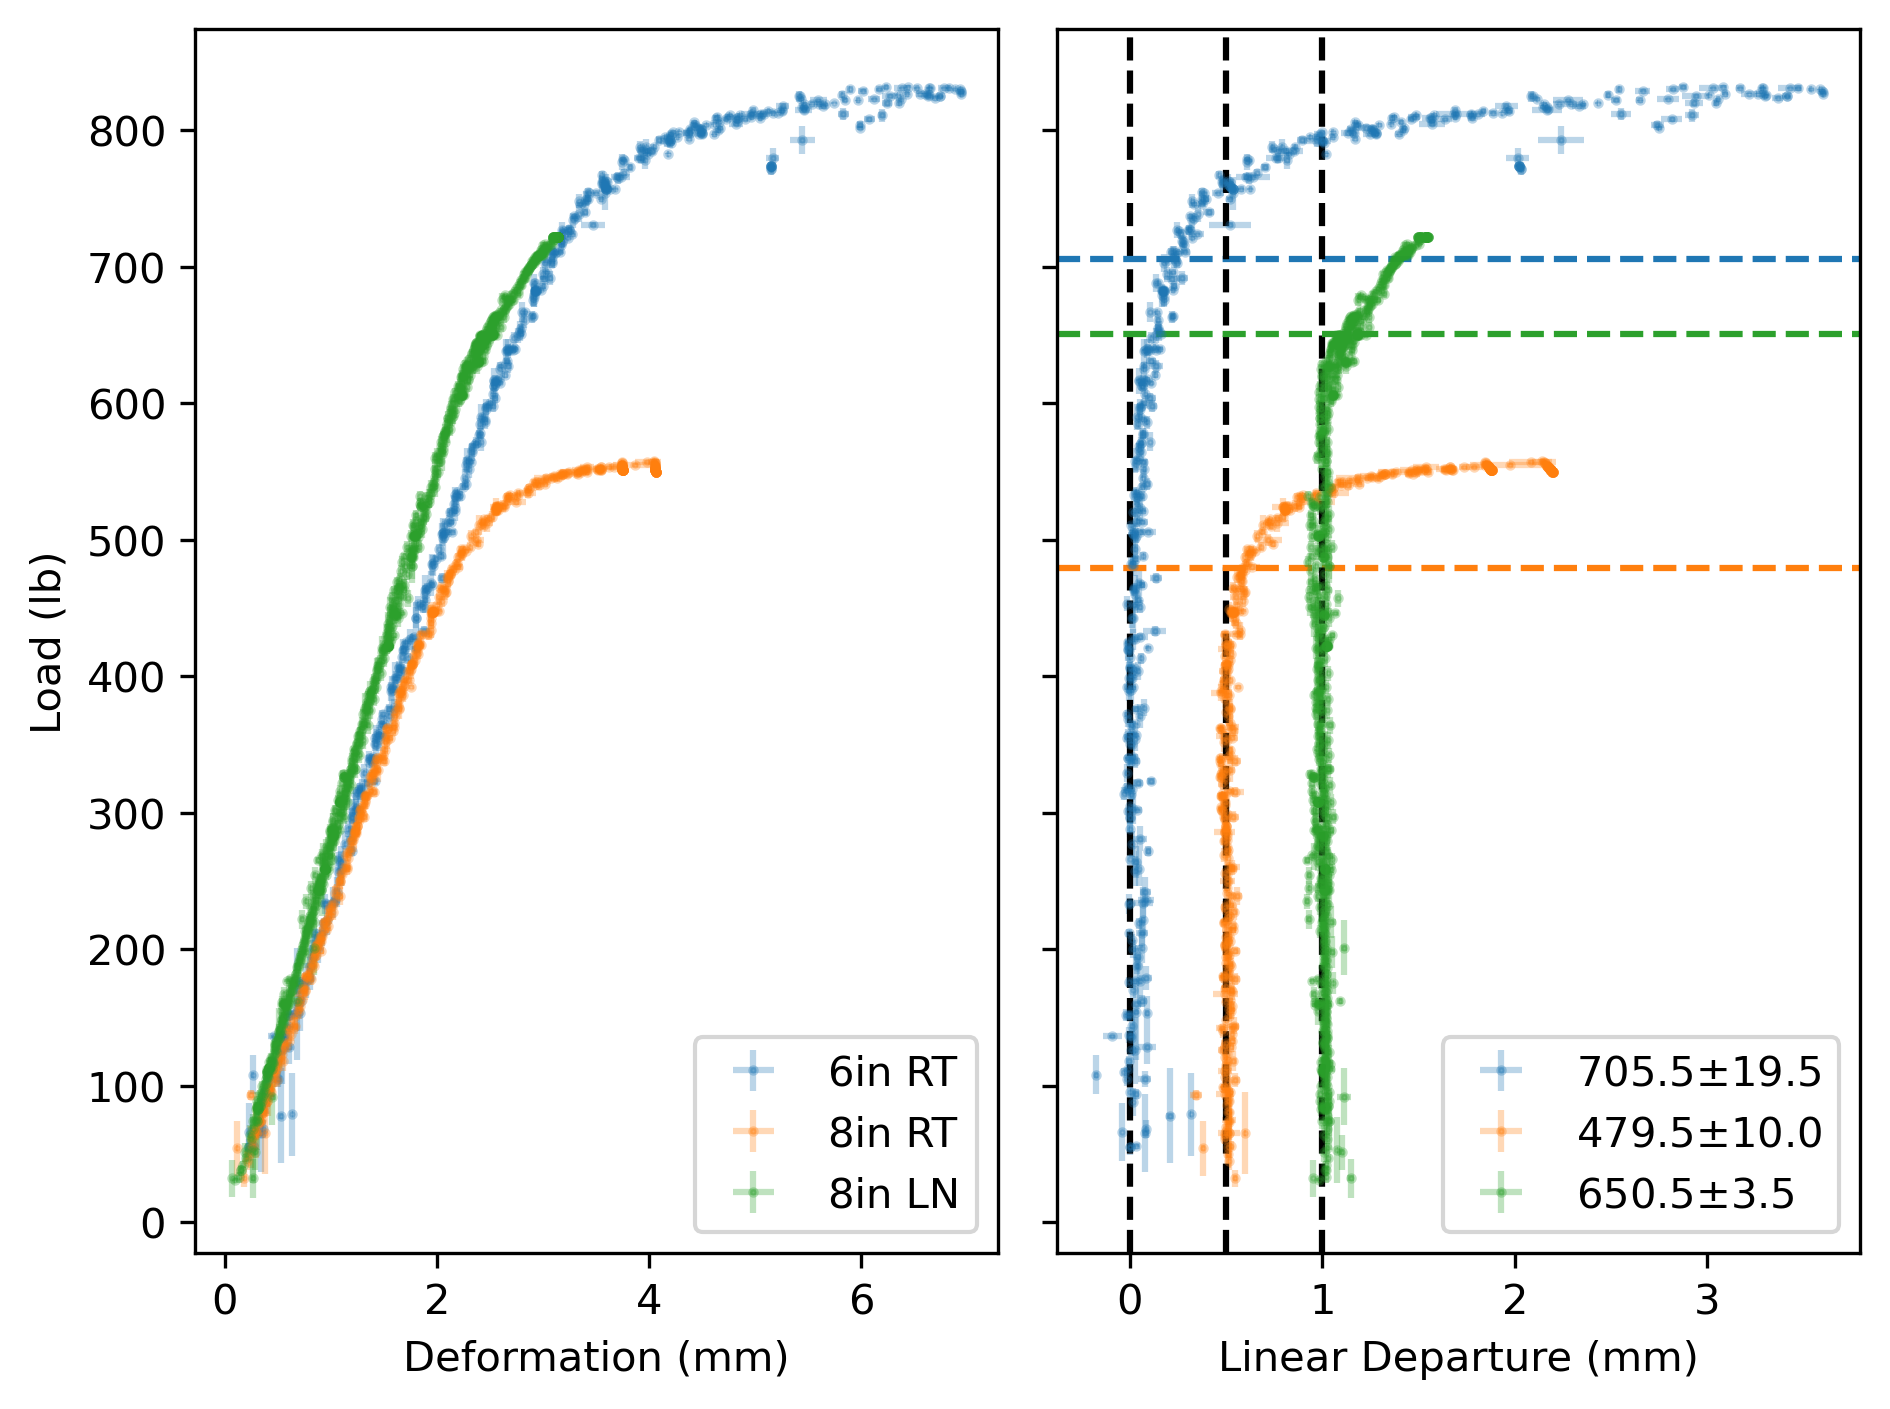

In [12]:
fig, ax = plt.subplots(1, 2, dpi=300, sharey=True)
fit_model = sci.odr.Model(linear)
for i, fname in enumerate(fname_variants):
    fstream = np.load(f'../data/clean_analysis/buckling/bk332_{fname}.npz')
    x, f, xerr, ferr = fstream['x'], fstream['f'], fstream['xerr'], fstream['ferr']
    fit_msk = (f > tk332_fit_bound[i][0]) * (f < tk332_fit_bound[i][1])
    fit_data = sci.odr.RealData(x=f[fit_msk], y=x[fit_msk], sx=ferr[fit_msk], sy=xerr[fit_msk])
    fitter = sci.odr.ODR(fit_data, fit_model, beta0=[1., 1.])
    fit_res = fitter.run()
    cbl, cbl_err = estimate_cbl(x, f, fit_res, fit_msk)
    plt_msk = f > 30
    ax[0].errorbar(x[plt_msk] - fit_res.beta[1], f[plt_msk], xerr=xerr[plt_msk], yerr=ferr[plt_msk], \
                   ls='', fmt='.', alpha=0.3, label=labels[fname], ms=3, c=colors[i])
    ax[1].errorbar(x[plt_msk] - linear(fit_res.beta, f[plt_msk]) + i * 0.5, f[plt_msk], xerr=xerr[plt_msk], \
                   yerr=ferr[plt_msk], ls='', fmt='.', alpha=0.3, \
                   ms=3, c=colors[i], label=f"{cbl:.1f}$\\pm${cbl_err:.1f}")
    ax[1].axvline(i * 0.5, c='k', ls='--')
    ax[1].axhline(cbl, ls='--', c=colors[i])

    # break
ax[0].legend(loc='lower right')
ax[1].legend()
ax[0].set_xlabel("Deformation (mm)")
ax[0].set_ylabel("Load (lb)")
# ax[0].set_title("3/32 inch")

# ax[1].set_xlabel("Load (lb)")
ax[1].set_xlabel("Linear Departure (mm)")
fig.tight_layout()
fig.savefig("images/bk332_result_num.png")

In [10]:
tk116_fit_bound = ((50, 150), (30, 150), (30, 175))

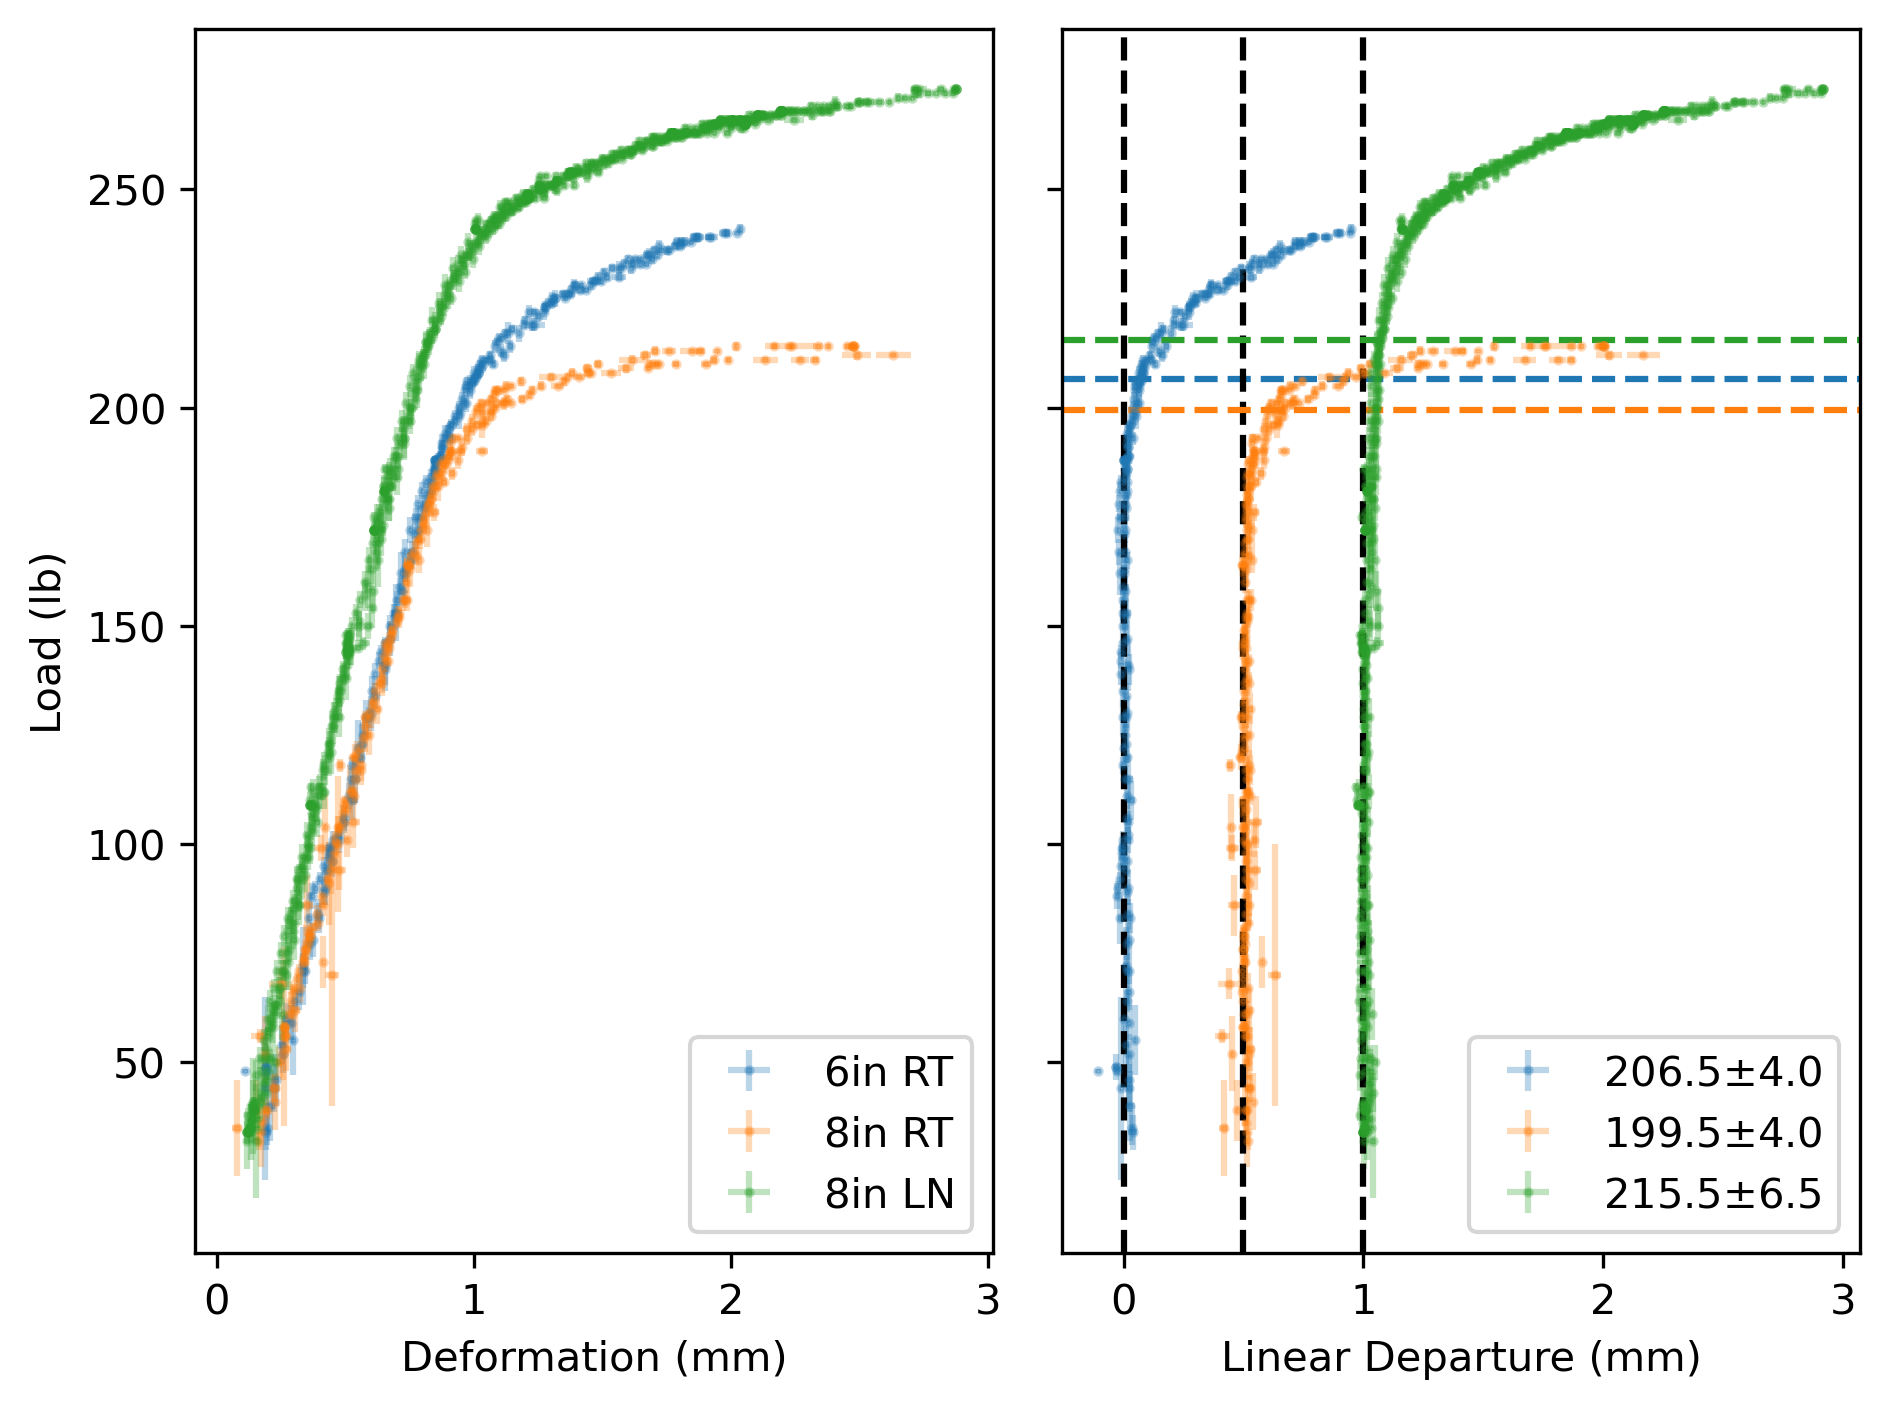

In [13]:
fig, ax = plt.subplots(1, 2, dpi=300, sharey=True)
fit_model = sci.odr.Model(linear)
for i, fname in enumerate(fname_variants):
    fstream = np.load(f'../data/clean_analysis/buckling/bk116_{fname}.npz')
    x, f, xerr, ferr = fstream['x'], fstream['f'], fstream['xerr'], fstream['ferr']
    fit_msk = (f > tk116_fit_bound[i][0]) * (f < tk116_fit_bound[i][1])
    fit_data = sci.odr.RealData(x=f[fit_msk], y=x[fit_msk], sx=ferr[fit_msk], sy=xerr[fit_msk])
    fitter = sci.odr.ODR(fit_data, fit_model, beta0=[1., 1.])
    fit_res = fitter.run()
    cbl, cbl_err = estimate_cbl(x, f, fit_res, fit_msk)
    plt_msk = f > 30
    ax[0].errorbar(x[plt_msk] - fit_res.beta[1], f[plt_msk], xerr=xerr[plt_msk], yerr=ferr[plt_msk], ls='', fmt='.', alpha=0.3, label=labels[fname], ms=3, c=colors[i])
    ax[1].errorbar(x[plt_msk] - linear(fit_res.beta, f[plt_msk]) + i * 0.5, f[plt_msk], xerr=xerr[plt_msk], yerr=ferr[plt_msk], ls='', fmt='.', alpha=0.3, \
                   ms=3, c=colors[i], label=f"{cbl:.1f}$\\pm${cbl_err:.1f}")
    ax[1].axvline(i * 0.5, c='k', ls='--')
    ax[1].axhline(cbl, ls='--', c=colors[i])
    # ax[1].axhline(cbl + cbl_err, ls='--', c=colors[i], alpha=0.5)
    # ax[1].axhline(cbl - cbl_err, ls='--', c=colors[i], alpha=0.5)

    # break
ax[0].legend(loc='lower right')
ax[1].legend()
ax[0].set_xlabel("Deformation (mm)")
ax[0].set_ylabel("Load (lb)")
# ax[0].set_title("3/32 inch")

# ax[1].set_xlabel("Load (lb)")
ax[1].set_xlabel("Linear Departure (mm)")
fig.tight_layout()
fig.savefig("images/bk116_result_num.png")

In [59]:
fit_res.pprint()

Beta: [ 0.00359243 -0.01529139]
Beta Std Error: [9.06094922e-06 2.61476057e-03]
Beta Covariance: [[ 2.35911375e-07 -6.26937332e-05]
 [-6.26937332e-05  1.96456021e-02]]
Residual Variance: 0.00034801543928662365
Inverse Condition #: 0.0013482078099299596
Reason(s) for Halting:
  Sum of squares convergence
